In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits, ascii
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy import units as u

from IPython.display import Image
from skimage.io import imread

from toasty import toast, cartesian_sampler, normalizer

from collections import defaultdict, namedtuple

In [2]:
fitsFile = fits.open('rings.v3.skycell.0776.087.stk.g.unconv.fits')
fitsFile.info()

Filename: rings.v3.skycell.0776.087.stk.g.unconv.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                CompImageHDU    294   (6255, 6265)   int16   


In [5]:
wcs.validate('rings.v3.skycell.0776.087.stk.g.unconv.fits')

HDU 1:
  WCS key ' ':
    - PC001001= -1.
      this form of the PCi_ja keyword is deprecated, use PCi_ja.
    - PC001002= 0.
      this form of the PCi_ja keyword is deprecated, use PCi_ja.
    - PC002001= 0.
      this form of the PCi_ja keyword is deprecated, use PCi_ja.
    - PC002002= 1.
      this form of the PCi_ja keyword is deprecated, use PCi_ja.
    - 'datfix' made the change 'Changed '' to
      '2013-02-11T03:30:10.343''.

In [32]:
w = wcs.WCS(fitsFile[1].header)
lon, lat = w.all_pix2world(30, 40, 0)
print(lon,lat)
p = w.all_world2pix(210.84957670452124,53.9779632935173,0)
print(p)

210.84957670452124 53.9779632935173
[array(30.000000000041837), array(40.00000000019881)]


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [7]:
rawFits = fits.open('7978055158.gpc1:LAP.PV3.20140730.ipp:2014:11:29:RINGS.V3:skycell.0802.079:RINGS.V3.skycell.0802.079.stk.3983989.unconv.num.fits')
rawFits.info()

Filename: 7978055158.gpc1:LAP.PV3.20140730.ipp:2014:11:29:RINGS.V3:skycell.0802.079:RINGS.V3.skycell.0802.079.stk.3983989.unconv.num.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                CompImageHDU    272   (6279, 6261)   int16   


In [17]:
rfWcs = wcs.WCS(rawFits[1].header)
footprint = rfWcs.calc_footprint(rawFits[1].header)
footprint

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


array([[ 24.00490736, -21.20526732],
       [ 24.01009963, -20.77087555],
       [ 23.54443727, -20.76565403],
       [ 23.53782866, -21.19992465]])

In [9]:
rfWcs.all_pix2world(0,0,0)

[array(24.004907359605184), array(-21.205267317565657)]

In [24]:
edgeCoords = rfWcs.all_world2pix(footprint,0)
edgeCoords

array([[  1.81898940e-11,  -4.91127139e-11],
       [  8.73114914e-11,   6.26000000e+03],
       [  6.27800000e+03,   6.26000000e+03],
       [  6.27800000e+03,   4.00177669e-11]])

In [25]:
edgePixs = edgeCoords.astype(int)
edgePixs

array([[   0,    0],
       [   0, 6260],
       [6277, 6260],
       [6278,    0]])

In [3]:
imgData = fitsFile[1].data
imgData.shape

(6265, 6255)

In [47]:
temp = [x for x in imgData.flatten() if not np.isnan(x)]

In [49]:
temp=np.array(temp)

In [52]:
print(temp.min())
print(temp.max())

-3.32997
9.89423


In [7]:
imgData[:4,:4]

array([[        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan, -0.24770784, -0.43612766],
       [        nan,         nan, -0.49662757, -0.92566347]], dtype=float32)

In [8]:
imgData = imgData[:3125,:6250]
imgData.shape

(3125, 6250)

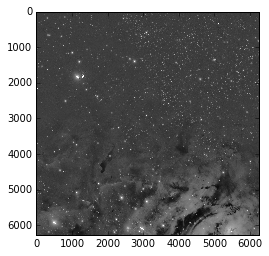

In [4]:
plt.imshow(imgData, cmap='gray')

In [10]:
sampler = normalizer(cartesian_sampler(imgData), 0, 1)
depth = 2
output = 'toasts/pan1'

In [11]:
toast(sampler,depth,output)

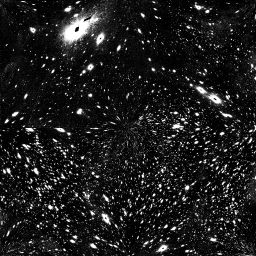

In [12]:
Image(filename="toasts/pan1/0/0/0_0.png")

In [156]:
Pos = namedtuple('Pos', 'n x y')
level1 = [[np.radians(c) for c in row]
          for row in [[(0, -90), (90, 0), (0, 90), (180, 0)],
                      [(90, 0), (0, -90), (0, 0), (0, 90)],
                      [(0, 90), (0, 0), (0, -90), (270, 0)],
                      [(180, 0), (0, 90), (270, 0), (0, -90)]]
        ]
level1

[[array([ 0.        , -1.57079633]),
  array([ 1.57079633,  0.        ]),
  array([ 0.        ,  1.57079633]),
  array([ 3.14159265,  0.        ])],
 [array([ 1.57079633,  0.        ]),
  array([ 0.        , -1.57079633]),
  array([ 0.,  0.]),
  array([ 0.        ,  1.57079633])],
 [array([ 0.        ,  1.57079633]),
  array([ 0.,  0.]),
  array([ 0.        , -1.57079633]),
  array([ 4.71238898,  0.        ])],
 [array([ 3.14159265,  0.        ]),
  array([ 0.        ,  1.57079633]),
  array([ 4.71238898,  0.        ]),
  array([ 0.        , -1.57079633])]]

In [11]:
todo = [(Pos(n=1, x=0, y=0), level1[0], True),
        (Pos(n=1, x=1, y=0), level1[1], False),
        (Pos(n=1, x=1, y=1), level1[2], True),
        (Pos(n=1, x=0, y=1), level1[3], False)]

In [12]:
todo

[(Pos(n=1, x=0, y=0),
  [array([ 0.        , -1.57079633]),
   array([ 1.57079633,  0.        ]),
   array([ 0.        ,  1.57079633]),
   array([ 3.14159265,  0.        ])],
  True),
 (Pos(n=1, x=1, y=0),
  [array([ 1.57079633,  0.        ]),
   array([ 0.        , -1.57079633]),
   array([ 0.,  0.]),
   array([ 0.        ,  1.57079633])],
  False),
 (Pos(n=1, x=1, y=1),
  [array([ 0.        ,  1.57079633]),
   array([ 0.,  0.]),
   array([ 0.        , -1.57079633]),
   array([ 4.71238898,  0.        ])],
  True),
 (Pos(n=1, x=0, y=1),
  [array([ 3.14159265,  0.        ]),
   array([ 0.        ,  1.57079633]),
   array([ 4.71238898,  0.        ]),
   array([ 0.        , -1.57079633])],
  False)]

In [22]:
l = np.array([0,0,1,1])
b = np.array([0,1,0,1])

In [23]:
data

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18]])

In [24]:
data[b,l]

array([1, 7, 2, 8])

In [141]:
def panstarrsSampler():
    fitsFile = fits.open('rings.v3.skycell.2381.053.stk.g.unconv.fits')
    rfWcs = wcs.WCS(fitsFile[1].header)
    footprint = rfWcs.calc_footprint(fitsFile[1].header)
    skycoordFootprint = np.array([SkyCoord(*x,frame='icrs', unit='deg') for x in footprint])
    imgData = fitsFile[1].data
    fitsFile.close()
    
    def vec2Pix(l,b):
        #print(l)
        #print(b)
        print("vec2pix")
        tile = np.zeros(l.shape)
        skyposes = SkyCoord(ra=l*u.rad,dec=b*u.rad, frame='icrs')
        #print(skyposes.shape)
        for (x,y),pos in np.ndenumerate(skyposes):
            #print(pos)
            if coordInFootprint(pos,skycoordFootprint):
                #print("woot")
                pLoc = rfWcs.all_world2pix(pos.icrs.ra,pos.icrs.dec,0)
                #print(pLoc)
                pix = imgData[int(pLoc[0]),int(pLoc[1])]
                #print(pix)
                if not np.isnan(pix):
                    tile[x,y] = pix
                #else:
                #    tile.append(0)
            #else:
            #    tile.append(0)
        return tile
    
    return vec2Pix
        
    
    

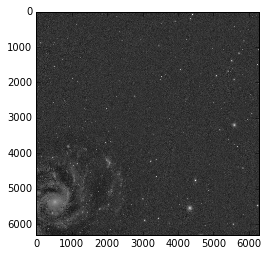

In [227]:
fitsFile = fits.open('rings.v3.skycell.2381.053.stk.r.unconv.fits')
imgData = fitsFile[1].data
plt.imshow(imgData, cmap='gray')

In [233]:
temp = [x for x in imgData.flatten() if not np.isnan(x)]
print(min(temp))
print(max(temp))

-2.50253
9.73304


In [276]:
rfWcs = wcs.WCS(fitsFile[1].header)
#footprint=np.array([SkyCoord(*x,frame='icrs',unit='deg') for x in rfWcs.calc_footprint(fitsFile[1].header)])
footprint = rfWcs.calc_footprint(fitsFile[1].header)
print(footprint)

[[ 210.85302454   53.97514527]
 [ 210.86786876   54.41257589]
 [ 210.11835316   54.41900608]
 [ 210.11137897   53.98147315]]


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [284]:
imgData.shape

(6302, 6283)

In [290]:
edgeCoords = rfWcs.all_world2pix(footprint,0).astype(int)
print(edgeCoords)

[[   0    0]
 [   0 6300]
 [6281 6300]
 [6281    0]]


In [292]:
print(len(imgData[0]))
print(len(imgData))

6283
6302


In [136]:
def coordInFootprint(skycoord,footprint): #MAKE THIS BETTER
    #print(skycoord.icrs)
    #print([x.icrs for x in footprint])
    #print(footprint[0].icrs.dec, skycoord.icrs.dec, footprint[1].icrs.dec)
    #print(footprint[2].icrs.ra, skycoord.icrs.ra, footprint[1].icrs.ra)
    if ((skycoord.icrs.dec >= footprint[0].icrs.dec) and (skycoord.icrs.dec <= footprint[1].icrs.dec)) and \
        ((skycoord.icrs.ra >= footprint[2].icrs.ra) and (skycoord.icrs.ra <= footprint[1].icrs.ra)):
        return True
    return False

In [267]:
i = 0

In [274]:
def panstarrsSampler():

    def vec2Pix(raArr,decArr):
        
        #tile = np.zeros(raArr.shape)
        
        raArr[raArr < 0] += 2 * np.pi # making all ras 0 - 2pi
        
        raCorners = np.array([raArr[0][0],raArr[0][-1],raArr[-1][0],raArr[-1][-1]])
        decCorners = np.array([decArr[0][0],decArr[0][-1],decArr[-1][0],decArr[-1][-1]])       
        minRa = min(raCorners)
        maxRa = max(raCorners)
        minDec = min(decCorners)
        maxDec = max(decCorners)
        
        
        global i
    
        if(i == 0):
            print("This is the red quadrant")
            tile = np.full((256,256,3),[188,31,0],np.uint8)
            i += 1
        elif(i == 1):
            print("This is the green quadrant")
            tile = np.full((256,256,3),[39,101,29],np.uint8)
            i += 1
        elif(i == 2):
            print("This is the yellow quadrant")
            tile = np.full((256,256,3),[255,188,0],np.uint8)
            i += 1
        elif(i == 3):
            print("This is the purple quadrant")
            tile = np.full((256,256,3),[96,30,146],np.uint8)
            i = 0
        
        
        print("Tile Corners")
        print("(",raArr[0][0],",",decArr[0][0],") (",raArr[0][-1],",",decArr[0][-1],")")
        print("(",raArr[-1][0],",",decArr[-1][0],") (",raArr[-1][-1],",",decArr[-1][-1],")")
        print()

        return tile
    
    return vec2Pix

In [275]:

sampler = panstarrsSampler()
output = '/Users/cbrasseur/Documents/Portal/Mashup/Clients/AstroView/testToast/'
depth = 1  
toast(sampler, depth, output)

This is the purple quadrant
Tile Corners
( 2.35619449019 , -1.5664575467 ) ( 1.57386428837 , 0.0 )
( 3.13852469201 , 0.0 ) ( 2.35619449019 , 1.5664575467 )

This is the red quadrant
Tile Corners
( 1.56772836522 , 0.0 ) ( 0.785398163397 , -1.5664575467 )
( 0.785398163397 , 1.5664575467 ) ( 0.00306796157577 , 0.0 )

This is the green quadrant
Tile Corners
( 5.49778714378 , 1.5664575467 ) ( 6.2801173456 , 0.0 )
( 4.71545694196 , 0.0 ) ( 5.49778714378 , -1.5664575467 )

This is the yellow quadrant
Tile Corners
( 3.14466061517 , 0.0 ) ( 3.92699081699 , 1.5664575467 )
( 3.92699081699 , -1.5664575467 ) ( 4.70932101881 , 0.0 )



In [215]:
fitsFile = fits.open('rings.v3.skycell.2381.053.stk.g.unconv.fits')
print(fitsFile.info())
rfWcs = wcs.WCS(fitsFile[1].header)
footprint = rfWcs.calc_footprint(fitsFile[1].header)
c = np.array([SkyCoord(*x,frame='icrs', unit='deg') for x in footprint])
fitsFile[1].header
imgData = fitsFile[1].data
np.amin(imgData)

Filename: rings.v3.skycell.2381.053.stk.g.unconv.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                CompImageHDU    209   (6283, 6302)   int16   
None


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


nan

In [2]:
psCells = ascii.read("filter_r_rings.rpt")

In [4]:
max(psCells['SCn'])

2643

In [19]:
psPthArr = np.full((max(psCells['SCn']) + 1,max(psCells['SCm']) + 1),"",dtype='<U168')

In [22]:
psPthArr[psCells['SCn'],psCells['SCm']] = psCells['fileNPath']

In [8]:
print(psCells[0])

SCn SCm                                                                                fileNPath                                                                               
--- --- -----------------------------------------------------------------------------------------------------------------------------------------------------------------------
635  10 /data/ps1/node15/stps15.1/nebulous/29/e9/7991654948.gpc1:LAP.PV3.20140730.bigmem:2014:12:08:RINGS.V3:skycell.0635.010:RINGS.V3.skycell.0635.010.stk.3999995.unconv.fits


In [23]:
psPthArr[635][10]

'/data/ps1/node15/stps15.1/nebulous/29/e9/7991654948.gpc1:LAP.PV3.20140730.bigmem:2014:12:08:RINGS.V3:skycell.0635.010:RINGS.V3.skycell.0635.010.stk.3999995.unconv.fits'

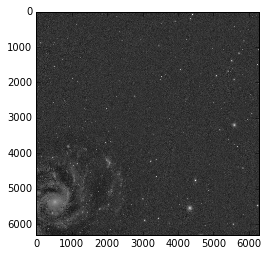

In [5]:
fitsFile = fits.open('rings.v3.skycell.2381.053.stk.r.unconv.fits')
imgData = fitsFile[1].data
plt.imshow(imgData, cmap='gray')